In [1]:
# Importing dependencies
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats
import numpy as np
from sklearn import datasets
import seaborn as sns

In [3]:
# Read the CSV file into a DataFrame
airline_data = pd.read_csv("Data.csv")
airline_data.head()

,YEAR,MONTH,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,...,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,airline_name,Description,Code.y
0,2018,1,1/9/18 00:00,AS,498,14057,12892,-13.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
1,2018,1,1/9/18 00:00,AS,502,14057,12892,-12.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
2,2018,1,1/9/18 00:00,AS,532,14057,14679,-5.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
3,2018,1,1/9/18 00:00,AS,540,14057,12892,-11.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
4,2018,1,1/9/18 00:00,AS,544,14057,12892,-6.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX


In [4]:
# Determining the shape of dataset
print(airline_data.dtypes)
airline_data.shape

YEAR                     int64
MONTH                    int64
FL_DATE                 object
OP_UNIQUE_CARRIER       object
OP_CARRIER_FL_NUM        int64
ORIGIN_AIRPORT_ID        int64
DEST_AIRPORT_ID          int64
DEP_DELAY              float64
DEP_DELAY_NEW          float64
DEP_DEL15              float64
DEP_DELAY_GROUP        float64
ARR_DELAY              float64
ARR_DELAY_NEW          float64
ARR_DEL15              float64
ARR_DELAY_GROUP        float64
CANCELLED                int64
CANCELLATION_CODE       object
DIVERTED                 int64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
airline_name            object
Description             object
Code.y                  object
dtype: object


(2359976, 26)

In [5]:
# Checking null counts across columns
null_counts = airline_data.isnull().sum()
print(null_counts)

YEAR                         0
MONTH                        0
FL_DATE                      0
OP_UNIQUE_CARRIER            0
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
DEST_AIRPORT_ID              0
DEP_DELAY                45474
DEP_DELAY_NEW            45474
DEP_DEL15                45474
DEP_DELAY_GROUP          45474
ARR_DELAY                51526
ARR_DELAY_NEW            51526
ARR_DEL15                51526
ARR_DELAY_GROUP          51526
CANCELLED                    0
CANCELLATION_CODE      2313116
DIVERTED                     0
CARRIER_DELAY          1916035
WEATHER_DELAY          1916035
NAS_DELAY              1916035
SECURITY_DELAY         1916035
LATE_AIRCRAFT_DELAY    1916035
airline_name                 0
Description                  0
Code.y                       0
dtype: int64


In [6]:
# Impute missing values in numeric columns with the mean
numeric_columns = ['DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
for column in numeric_columns:
    airline_data[column].fillna(airline_data[column].mean(), inplace=True)

In [7]:
# Checking null counts again
null_counts = airline_data.isnull().sum()
print(null_counts)

YEAR                         0
MONTH                        0
FL_DATE                      0
OP_UNIQUE_CARRIER            0
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
DEST_AIRPORT_ID              0
DEP_DELAY                    0
DEP_DELAY_NEW            45474
DEP_DEL15                45474
DEP_DELAY_GROUP          45474
ARR_DELAY                    0
ARR_DELAY_NEW            51526
ARR_DEL15                51526
ARR_DELAY_GROUP          51526
CANCELLED                    0
CANCELLATION_CODE      2313116
DIVERTED                     0
CARRIER_DELAY                0
WEATHER_DELAY                0
NAS_DELAY                    0
SECURITY_DELAY               0
LATE_AIRCRAFT_DELAY          0
airline_name                 0
Description                  0
Code.y                       0
dtype: int64


In [8]:
# Checking for min/max cancelled and diverted flights
max_cancelled = airline_data['CANCELLED'].max()
min_cancelled = airline_data['CANCELLED'].min()
max_diverted = airline_data['DIVERTED'].max()
min_diverted = airline_data['DIVERTED'].min()

print("Max CANCELLED:", max_cancelled)
print("Min CANCELLED:", min_cancelled)
print("Max DIVERTED:", max_diverted)
print("Min DIVERTED:", min_diverted)

Max CANCELLED: 1
Min CANCELLED: 0
Max DIVERTED: 1
Min DIVERTED: 0


In [9]:
# Calculating the number of cancelled and diverted flights
cancelled_count = airline_data['CANCELLED'].value_counts().get(1, 0)

diverted_count = airline_data['DIVERTED'].value_counts().get(1, 0)

print("Number of cancelled flights:", cancelled_count)
print("Number of diverted flights :", diverted_count)

Number of cancelled flights: 46860
Number of diverted flights : 4667


## Question 1 - What was the variation in on-time performance among different airlines?

In [10]:
# Creating subset of data, to use required columns for analysis
SUBSET_COLS = ["ORIGIN_AIRPORT_ID", "Description",  "OP_UNIQUE_CARRIER",
               "airline_name", "YEAR", "MONTH", "FL_DATE", "OP_CARRIER_FL_NUM",
               "DEST_AIRPORT_ID", "DEP_DELAY","ARR_DELAY", "CANCELLED", "DIVERTED"]
subset_data = airline_data.loc[:, SUBSET_COLS].dropna()
null_counts = subset_data.isnull().sum()
print(null_counts)
print(subset_data.shape)

ORIGIN_AIRPORT_ID    0
Description          0
OP_UNIQUE_CARRIER    0
airline_name         0
YEAR                 0
MONTH                0
FL_DATE              0
OP_CARRIER_FL_NUM    0
DEST_AIRPORT_ID      0
DEP_DELAY            0
ARR_DELAY            0
CANCELLED            0
DIVERTED             0
dtype: int64
(2359976, 13)


In [11]:
# Checking min/max values in all columns
airline_data.describe()
# Checking min/max values in all columns
airline_data.describe()

,YEAR,MONTH,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,2.359976e+06,2.359976e+06,2.359976e+06,2.359976e+06,2.359976e+06,2.359976e+06,2.314502e+06,2.314502e+06,2.314502e+06,2.359976e+06,2.308450e+06,2.308450e+06,2.308450e+06,2.359976e+06,2.359976e+06,2.359976e+06,2.359976e+06,2.359976e+06,2.359976e+06,2.359976e+06
mean,2.019748e+03,6.296430e+00,8.777711e+02,1.297191e+04,1.300940e+04,8.125578e+00,1.248565e+01,1.790994e-01,-3.617495e-02,3.515730e+00,1.290445e+01,1.923117e-01,-2.508163e-01,1.985613e-02,1.977562e-03,1.729263e+01,1.910896e+00,2.053852e+01,2.624313e-01,2.169744e+01
std,1.363459e+00,3.410495e+00,6.871444e+02,1.543660e+03,1.532922e+03,4.157532e+01,4.038674e+01,3.834356e-01,2.167581e+00,4.381002e+01,4.012295e+01,3.941167e-01,2.309937e+00,1.395058e-01,4.442581e-02,2.101178e+01,7.749735e+00,1.755143e+01,1.784018e+00,2.215592e+01
min,2.018000e+03,1.000000e+00,1.000000e+00,1.014000e+04,1.014000e+04,-1.140000e+02,0.000000e+00,0.000000e+00,-2.000000e+00,-1.060000e+02,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.019000e+03,3.000000e+00,3.780000e+02,1.143300e+04,1.161800e+04,-7.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.600000e+01,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,1.729263e+01,1.910896e+00,2.053852e+01,2.624313e-01,2.169744e+01
50%,2.020000e+03,6.000000e+00,7.290000e+02,1.319800e+04,1.320400e+04,-3.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-6.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.729263e+01,1.910896e+00,2.053852e+01,2.624313e-01,2.169744e+01
75%,2.021000e+03,9.000000e+00,1.185000e+03,1.463500e+04,1.467900e+04,7.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.729263e+01,1.910896e+00,2.053852e+01,2.624313e-01,2.169744e+01
max,2.022000e+03,1.200000e+01,7.951000e+03,1.599100e+04,1.599100e+04,1.527000e+03,1.527000e+03,1.000000e+00,1.200000e+01,1.527000e+03,1.527000e+03,1.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,1.512000e+03,1.236000e+03,1.515000e+03,4.280000e+02,1.520000e+03


In [12]:
# Calculating total arrival and departure delay to figure out on-time performance
airline_data["ARR_DELAY"].abs() + airline_data["DEP_DELAY"].abs()

0           59.000000
1           14.000000
2           13.000000
3           34.000000
4           18.000000
              ...    
2359971    338.000000
2359972    239.000000
2359973     74.000000
2359974     80.000000
2359975     11.641308
Length: 2359976, dtype: float64

In [13]:
# Defining function to calculate actual Arrival Delay
def actual_delay(raw_delay):
    corrected_delay = max(0, raw_delay)
    return corrected_delay

In [14]:
# Calculating total arrival and departure delay to figure out on-time performance
subset_data["ARR_DELAY"].map(actual_delay)
subset_data["DEP_DELAY"].map(actual_delay)

0            0.000000
1            0.000000
2            0.000000
3            0.000000
4            0.000000
              ...    
2359971    173.000000
2359972    120.000000
2359973     41.000000
2359974     36.000000
2359975      8.125578
Name: DEP_DELAY, Length: 2359976, dtype: float64

In [15]:
# Apply the function to create a new column 'Actual Delay'
subset_data['Actual Arrival Delay'] = subset_data["ARR_DELAY"].map(actual_delay)
subset_data["Actual Departure Delay"]= subset_data["DEP_DELAY"].map(actual_delay)

In [16]:
# Display the df to see if info has been updated correctly
subset_data.head()

,ORIGIN_AIRPORT_ID,Description,OP_UNIQUE_CARRIER,airline_name,YEAR,MONTH,FL_DATE,OP_CARRIER_FL_NUM,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,Actual Arrival Delay,Actual Departure Delay
0,14057,"Portland, OR: Portland International",AS,Alaska,2018,1,1/9/18 00:00,498,12892,-13.0,-46.0,0,0,0.0,0.0
1,14057,"Portland, OR: Portland International",AS,Alaska,2018,1,1/9/18 00:00,502,12892,-12.0,-2.0,0,0,0.0,0.0
2,14057,"Portland, OR: Portland International",AS,Alaska,2018,1,1/9/18 00:00,532,14679,-5.0,-8.0,0,0,0.0,0.0
3,14057,"Portland, OR: Portland International",AS,Alaska,2018,1,1/9/18 00:00,540,12892,-11.0,-23.0,0,0,0.0,0.0
4,14057,"Portland, OR: Portland International",AS,Alaska,2018,1,1/9/18 00:00,544,12892,-6.0,12.0,0,0,12.0,0.0


In [18]:
# Convert numeric month to month name
subset_data['MONTH'] = subset_data['MONTH'].apply(lambda x: pd.Timestamp(year=subset_data['YEAR'].iloc[0], month=x, day=1).strftime('%B'))

# Remove the timestamp from the 'FL_DATE' column
subset_data['FL_DATE'] = pd.to_datetime(subset_data['FL_DATE']).dt.strftime('%m/%d/%y')

In [19]:
# Display the df to see if info has been updated correctly
subset_data.head()

,ORIGIN_AIRPORT_ID,Description,OP_UNIQUE_CARRIER,airline_name,YEAR,MONTH,FL_DATE,OP_CARRIER_FL_NUM,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,Actual Arrival Delay,Actual Departure Delay
0,14057,"Portland, OR: Portland International",AS,Alaska,2018,January,01/09/18,498,12892,-13.0,-46.0,0,0,0.0,0.0
1,14057,"Portland, OR: Portland International",AS,Alaska,2018,January,01/09/18,502,12892,-12.0,-2.0,0,0,0.0,0.0
2,14057,"Portland, OR: Portland International",AS,Alaska,2018,January,01/09/18,532,14679,-5.0,-8.0,0,0,0.0,0.0
3,14057,"Portland, OR: Portland International",AS,Alaska,2018,January,01/09/18,540,12892,-11.0,-23.0,0,0,0.0,0.0
4,14057,"Portland, OR: Portland International",AS,Alaska,2018,January,01/09/18,544,12892,-6.0,12.0,0,0,12.0,0.0


In [20]:
# Calculate the airline with the maximum delay
average_arrival_delay = airline_data.groupby('airline_name')['ARR_DELAY'].mean()

# Find the airline with the maximum average arrival delay
airline_with_max_delay = average_arrival_delay.idxmax()
max_avg_delay = average_arrival_delay.max()

# Print the result
print(f"The airline with the maximum average arrival delay is {airline_with_max_delay} with an average delay of {max_avg_delay} minutes.")

The airline with the maximum average arrival delay is Frontier with an average delay of 7.865047169087845 minutes.


In [21]:
# Calculate the airline with the maximum delay
average_dep_delay = airline_data.groupby('airline_name')['DEP_DELAY'].mean()

# Find the airline with the maximum average arrival delay
airline_with_max_delay = average_arrival_delay.idxmax()
max_avg_delay = average_dep_delay.max()

# Print the result
print(f"The airline with the maximum average departure delay is {airline_with_max_delay} with an average delay of {max_avg_delay} minutes.")

The airline with the maximum average departure delay is Frontier with an average delay of 13.287232982476926 minutes.


In [23]:
# Calculating # of on-time flights for top 3 airlines
on_time_flights = len(subset_data[subset_data["Actual Arrival Delay"] == 0])
print(f"Number of on-time flights: {on_time_flights}")
on_time_flights = subset_data[subset_data["Actual Arrival Delay"] == 0].groupby("airline_name").size()
print(on_time_flights)

Number of on-time flights: 1494196
airline_name
Alaska      618994
Frontier    340804
Spirit      534398
dtype: int64


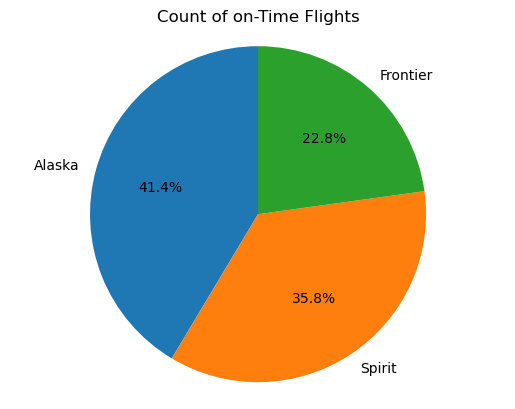

In [35]:
import matplotlib.pyplot as plt

# Creating a Pie-Chart based on time performance
labels = ['Alaska', 'Spirit','Frontier']
sizes = [618994, 534398,340804]

# Create a 2D pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Count of on-Time Flights")

# Show the pie chart
plt.axis('equal')
plt.show()

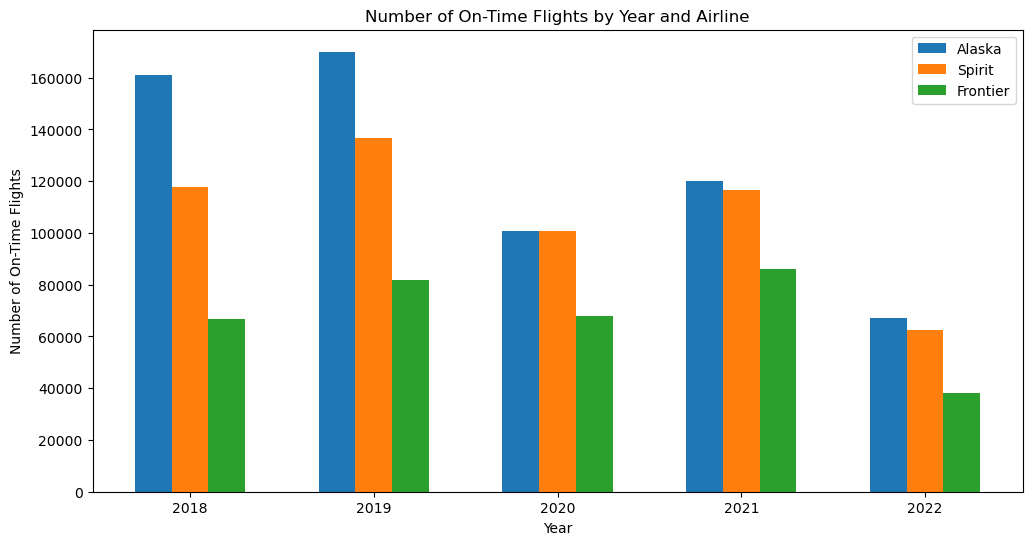

In [26]:
# Group data by year and airline, and count the number of on-time flights
on_time_counts = subset_data[subset_data["Actual Arrival Delay"] == 0].groupby(["YEAR", "airline_name"]).size()
# Get unique airlines in the dataset
airlines = subset_data["airline_name"].unique()

# Create a clustered bar chart
fig, ax = plt.subplots(figsize=(12, 6))  
width = 0.2
years = on_time_counts.index.get_level_values('YEAR').unique()

for i, airline in enumerate(airlines):
    on_time_counts_airline = on_time_counts.loc[(slice(None), airline)]
    positions = np.arange(len(years)) + i * width
    ax.bar(positions, on_time_counts_airline, width=width, label=airline)

ax.set_xticks(np.arange(len(years)) + (len(airlines) / 2 - 0.5) * width)
ax.set_xticklabels(years)
ax.set_xlabel("Year")
ax.set_ylabel("Number of On-Time Flights")
ax.set_title("Number of On-Time Flights by Year and Airline")
ax.legend()

plt.show()

# Hypothesis

### Null Hypothesis (H0): There is no significant relationship between the month and the number of on-time flights.

### Alternative Hypothesis (H1): There is a significant relationship between the month and the number of on-time flights.

In [36]:
# Group data by month and count the number of on-time flights
on_time_counts_by_month = subset_data[subset_data["Actual Arrival Delay"] == 0].groupby("MONTH").size().reset_index()
on_time_counts_by_month.columns = ['Month', 'On-Time Flights']

In [44]:
# Ensure 'On-Time Flights' is in numerical format (e.g., int)
on_time_counts_by_month['On-Time Flights'] = on_time_counts_by_month['On-Time Flights'].astype(int)

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(on_time_counts_by_month['Month'], on_time_counts_by_month['On-Time Flights'])

# Define a function for the regression line
def regression_line(x):
    return slope * x + intercept

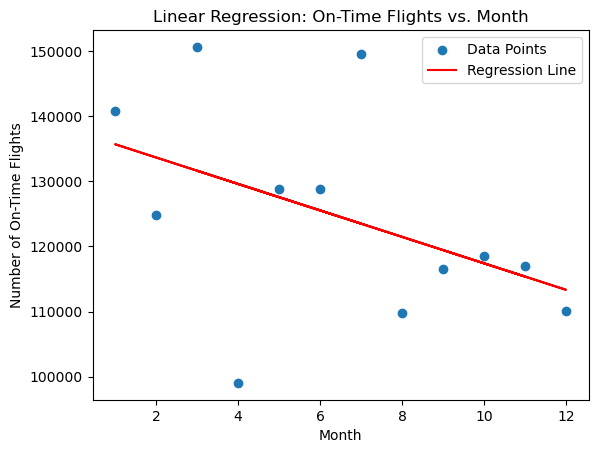

In [47]:
# Plot the data points
plt.scatter(on_time_counts_by_month['Month'], on_time_counts_by_month['On-Time Flights'], label='Data Points')

# Plot the regression line
plt.plot(on_time_counts_by_month['Month'], regression_line(on_time_counts_by_month['Month']), color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Number of On-Time Flights')
plt.title('Linear Regression: On-Time Flights vs. Month')

# Show the plot
plt.legend()
plt.show()

In [48]:
# Calculate r-value (correlation coefficient)
r_value = stats.linregress(on_time_counts_by_month['Month'], on_time_counts_by_month['On-Time Flights']).rvalue

# Display the correlation coefficient
print(f'Correlation Coefficient (r-value): {r_value:.2f}')

Correlation Coefficient (r-value): -0.46


- The magnitude of -0.46 suggests a moderate strength of the relationship. While it's not a perfect correlation, it's still substantial enough to suggest that there is some relationship between the month and the number of on-time flights.

- The fact that the r-value is not equal to zero supports the alternative hypothesis (H1) that there is a significant relationship between the month and the number of on-time flights.

Overall, the negative r-value and its magnitude suggest that the month has a statistically significant influence on the number of on-time flights, which aligns with the alternative hypothesis.

# Question 2 - What are the main causes for delays?

In [50]:
# Import and read in csv file
df = pd.read_csv("Data.csv")
df.shape

(2359976, 26)

In [51]:
# Reduce columns to pertinent information only
df[['OP_UNIQUE_CARRIER', 'airline_name',
       'YEAR', 'MONTH', 'DIVERTED', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]
df = df[['OP_UNIQUE_CARRIER', 'airline_name',
       'YEAR', 'MONTH', 'DIVERTED', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]
df.dtypes

OP_UNIQUE_CARRIER       object
airline_name            object
YEAR                     int64
MONTH                    int64
DIVERTED                 int64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
dtype: object

In [52]:
# Reduce to only the three following airlines - Alaska, Frontier and Spirit
# condition1 = df['airline_name'] == ('Alaska', 'Frontier', 'Spirit')
condition1 = df ['airline_name'].isin(['Alaska', 'Frontier', 'Spirit'])
filtered_df = df[condition1]

df = filtered_df

In [53]:
# Changing the data type for Year and month 
pd.to_datetime(df['YEAR'])
pd.to_datetime(df['MONTH'])

df

,OP_UNIQUE_CARRIER,airline_name,YEAR,MONTH,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,AS,Alaska,2018,1,0,NaN,NaN,NaN,NaN,NaN
1,AS,Alaska,2018,1,0,NaN,NaN,NaN,NaN,NaN
2,AS,Alaska,2018,1,0,NaN,NaN,NaN,NaN,NaN
3,AS,Alaska,2018,1,0,NaN,NaN,NaN,NaN,NaN
4,AS,Alaska,2018,1,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2359971,F9,Frontier,2022,7,0,80.0,0.0,85.0,0.0,0.0
2359972,F9,Frontier,2022,7,0,69.0,0.0,28.0,0.0,22.0
2359973,F9,Frontier,2022,7,0,12.0,0.0,21.0,0.0,0.0
2359974,F9,Frontier,2022,7,0,18.0,0.0,8.0,0.0,18.0


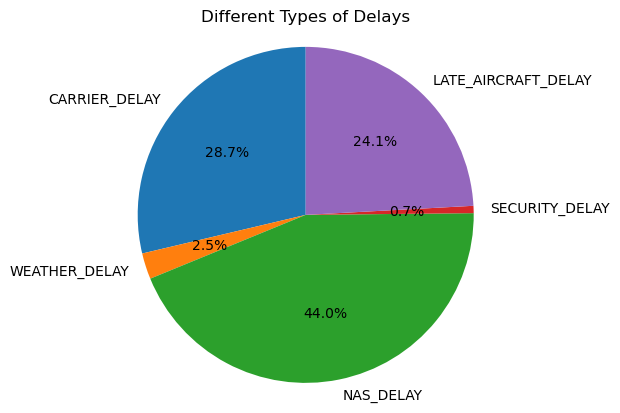

In [86]:
# Reduce columns to pertinent information only
subset_data = df[['OP_UNIQUE_CARRIER', 'airline_name', 'YEAR', 'MONTH', 'DIVERTED', 'CARRIER_DELAY',
                  'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]

# Calculate the count of different types of delays
delay_columns = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
delay_counts = [subset_data[column].apply(lambda x: 1 if x > 0 else 0).sum() for column in delay_columns]

# Create a pie chart
labels = delay_columns
sizes = delay_counts

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Different Types of Delays")

# Show the pie chart
plt.axis('equal')
plt.show()

In [63]:
# Group the data by airline and calculate flight counts in each category
flight_counts = subset_data.groupby(['airline_name', 'DIVERTED', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']).size().reset_index(name='flight_count')

# Filter the data to retain only the relevant categories
categories = ['DIVERTED', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

# Create a dictionary to store the counts for each category by airline
category_counts_by_airline = {}

for category in categories:
    category_data = flight_counts[flight_counts[category] > 0]
    total_counts = category_data.groupby('airline_name')['flight_count'].sum()
    category_counts_by_airline[category] = total_counts

# Display the counts for each category by airline
for category, counts in category_counts_by_airline.items():
    print(f"Category: {category}")
    print(counts)

Category: DIVERTED
Series([], Name: flight_count, dtype: int64)
Category: CARRIER_DELAY
airline_name
Alaska      56348
Frontier    73429
Spirit      66612
Name: flight_count, dtype: int64
Category: WEATHER_DELAY
airline_name
Alaska      4842
Frontier    3946
Spirit      8356
Name: flight_count, dtype: int64
Category: NAS_DELAY
airline_name
Alaska      107278
Frontier     76825
Spirit      116795
Name: flight_count, dtype: int64
Category: SECURITY_DELAY
airline_name
Alaska    1840
Spirit    2938
Name: flight_count, dtype: int64
Category: LATE_AIRCRAFT_DELAY
airline_name
Alaska      53058
Frontier    66456
Spirit      45687
Name: flight_count, dtype: int64


In [66]:
# Checking # of carrier delay flights
df[df['CARRIER_DELAY']!=0.0]['airline_name'].value_counts() \
.head(10)

Alaska      864283
Spirit      740596
Frontier    507545
Name: airline_name, dtype: int64

In [68]:
df[df['WEATHER_DELAY']!=0.0]['airline_name'].value_counts() \
.head()

Alaska      812777
Spirit      682340
Frontier    438062
Name: airline_name, dtype: int64

In [69]:
# Delays or cancellations coded "NAS" are the type of weather delays that could be reduced with corrective 
# action by the airports or the Federal Aviation Administration. NAS_DELAY

df[df['NAS_DELAY']!=0.0]['airline_name'].value_counts() \
.head(10)

Alaska      915213
Spirit      790779
Frontier    510941
Name: airline_name, dtype: int64

In [70]:
# Delays or cancellations coded "SECURITY_DELAY" 
df[df['SECURITY_DELAY']!=0.0]['airline_name'].value_counts() \
.head(10)

Alaska      809775
Spirit      676922
Frontier    434116
Name: airline_name, dtype: int64

In [71]:
# Delays or cancellations coded "LATE_AIRCRAFT_DELAY" 
df[df['LATE_AIRCRAFT_DELAY']!=0.0]['airline_name'].value_counts() \
.head(10)

Alaska      860993
Spirit      719671
Frontier    500572
Name: airline_name, dtype: int64

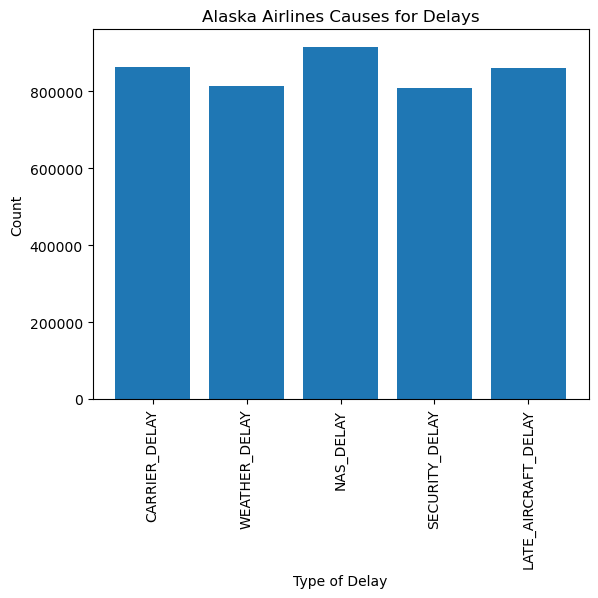

In [73]:
# Alaska
x_values = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
y_values = [864283, 812777, 915213, 809775, 860993]

# Plot the values
plt.bar(x_values, y_values,)
plt.xticks(rotation = 'vertical')

# Add labels and title
plt.xlabel('Type of Delay')
plt.ylabel('Count')
plt.title('Alaska Airlines Causes for Delays')

# Display the plot
plt.show()

C:\Users\sharm\AppData\Local\Temp\ipykernel_21008\442825687.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('cool')


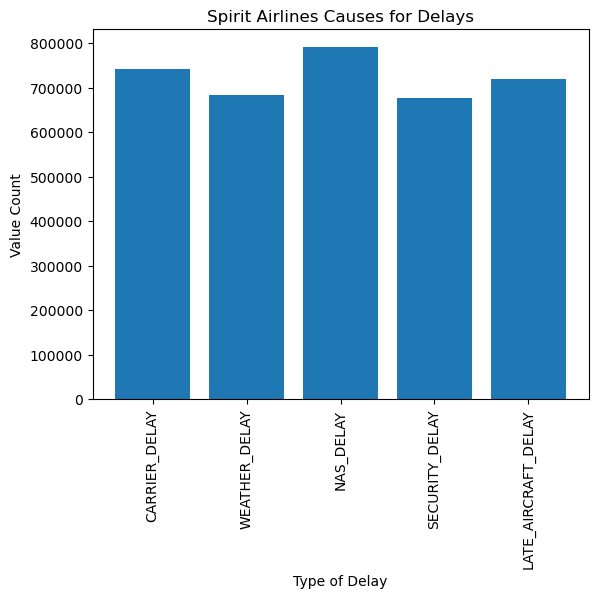

In [74]:
# Spirit
x_values = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
y_values = [740596, 682340, 790779, 676922, 719671]

# Plot the values
plt.bar(x_values, y_values)
plt.xticks(rotation = 'vertical')

n, bins, patches = plt.hist(x_values)

# Choose a colormap
colormap = plt.cm.get_cmap('cool')

# Set gradient colors to the patches
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for patch, color in zip(patches, colormap(bin_centers)):
    patch.set_facecolor(color)

# Add labels and title
plt.xlabel('Type of Delay')
plt.ylabel('Value Count')
plt.title('Spirit Airlines Causes for Delays')

# Display the plot
plt.show()

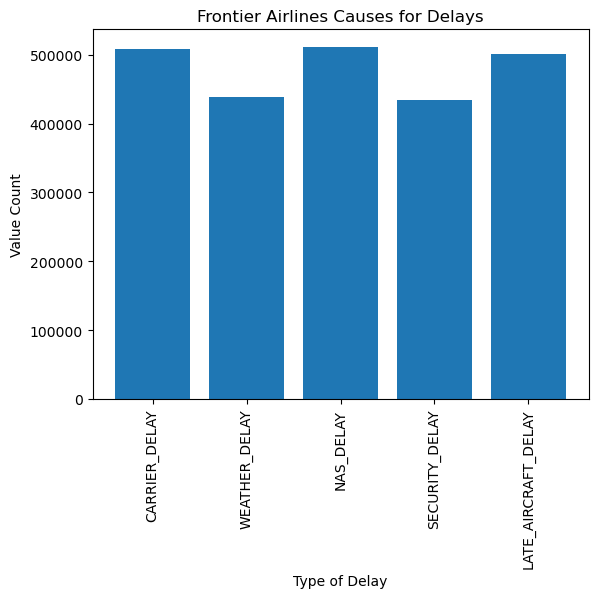

In [75]:
# Frontier

x_values = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
y_values = [507545, 438062, 510941, 434116, 500572]

# Plot the values
plt.bar(x_values, y_values)
plt.xticks(rotation = 'vertical')


# Add labels and title
plt.xlabel('Type of Delay')
plt.ylabel('Value Count')
plt.title('Frontier Airlines Causes for Delays')

# Display the plot
plt.show()

# Question 3 - Would the travel delays be effected by the month of the year

In this analysis, we are checking if there is any corelation between flight delays and the time of the year. This analysis can help airlines and airports optimize scheduling and allocate resources more effectively.

## Creating the tables for each airline - Alaska, Frontier & Spirit

### Creating the clean table for Alaska Airlines

In [48]:
#Creating a rough table for analysis
alaska_rough = airline_data.loc[airline_data["airline_name"]=="Alaska",:]
alaska = alaska_rough[["YEAR","MONTH","DEP_DELAY","ARR_DELAY"]]

#Calculating the mean of arrival and departure delays in each month of the year
dep_delay_alaska = alaska.groupby(['YEAR','MONTH'])["DEP_DELAY"].mean().round(0).reset_index()
arr_delay_alaska = alaska.groupby(['YEAR','MONTH'])["ARR_DELAY"].mean().round(0).reset_index()

#Merging both DataFrames to create the final table
alaska_df = pd.merge(dep_delay_alaska,arr_delay_alaska, on=["YEAR", "MONTH"], how="left")
alaska_df.columns = ["Year", "Month", "Departure Delay", "Arrival Delay"]
alaska_df

,Year,Month,Departure Delay,Arrival Delay
0,2018,1,-2.0,-7.0
1,2018,2,-1.0,-4.0
2,2018,3,-1.0,-4.0
3,2018,4,2.0,-0.0
4,2018,5,3.0,2.0
5,2018,6,3.0,-0.0
6,2018,7,3.0,0.0
7,2018,8,8.0,7.0
8,2018,9,0.0,-3.0
9,2018,10,3.0,1.0


### Creating the clean table for Frontier Airlines

In [50]:
#Creating a rough table for analysis
frontier_rough = airline_data.loc[airline_data["airline_name"]=="Frontier",:]
frontier = frontier_rough[["YEAR","MONTH","DEP_DELAY","ARR_DELAY"]]

#Calculating the mean of arrival and departure delays in each month of the year
dep_delay_frontier = frontier.groupby(['YEAR','MONTH'])["DEP_DELAY"].mean().round(0).reset_index()
arr_delay_frontier = frontier.groupby(['YEAR','MONTH'])["ARR_DELAY"].mean().round(0).reset_index()

#Merging both DataFrames to create the final table
frontier_df = pd.merge(dep_delay_frontier,arr_delay_frontier, on=["YEAR", "MONTH"], how="left")
frontier_df.columns = ["Year", "Month", "Departure Delay", "Arrival Delay"]

### Creating the clean table for Spirit Airlines

In [51]:
#Creating a rough table for analysis
spirit_rough = airline_data.loc[airline_data["airline_name"]=="Spirit",:]
spirit = spirit_rough[["YEAR","MONTH","DEP_DELAY","ARR_DELAY"]]

#Calculating the mean of arrival and departure delays in each month of the year
dep_delay_spirit = spirit.groupby(['YEAR','MONTH'])["DEP_DELAY"].mean().round(0).reset_index()
arr_delay_spirit = spirit.groupby(['YEAR','MONTH'])["ARR_DELAY"].mean().round(0).reset_index()

#Merging both DataFrames to create the final table
spirit_df = pd.merge(dep_delay_spirit,arr_delay_spirit, on=["YEAR", "MONTH"], how="left")
spirit_df.columns = ["Year", "Month", "Departure Delay", "Arrival Delay"]

## Plotting the graphs for Months vs Number of Delays for all the Airlines

### I. Alaska Airlines

#### - for Departure Delays

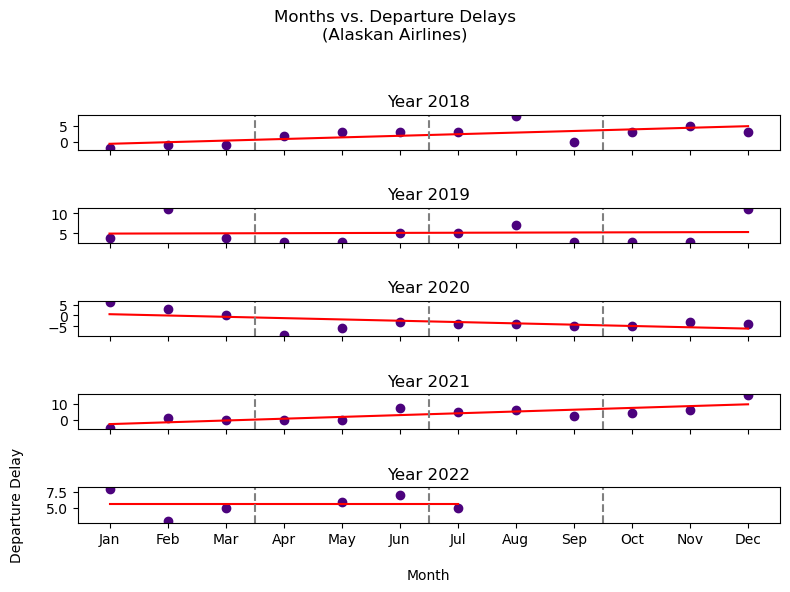

In [52]:
years = alaska_df["Year"].unique()

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years):
    #To choose the year in the DataFrame
    data = alaska_df[alaska_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Departure Delay'], color = "#4c027d")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Departure Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    #ax.set_ylim(-20, 40)
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Departure Delay\n')
fig.suptitle("Months vs. Departure Delays\n(Alaskan Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

#Saving the graph to a seperate folder
fig.savefig("Question_3/Alaskan_departure.png")

#### - Arrival Delays

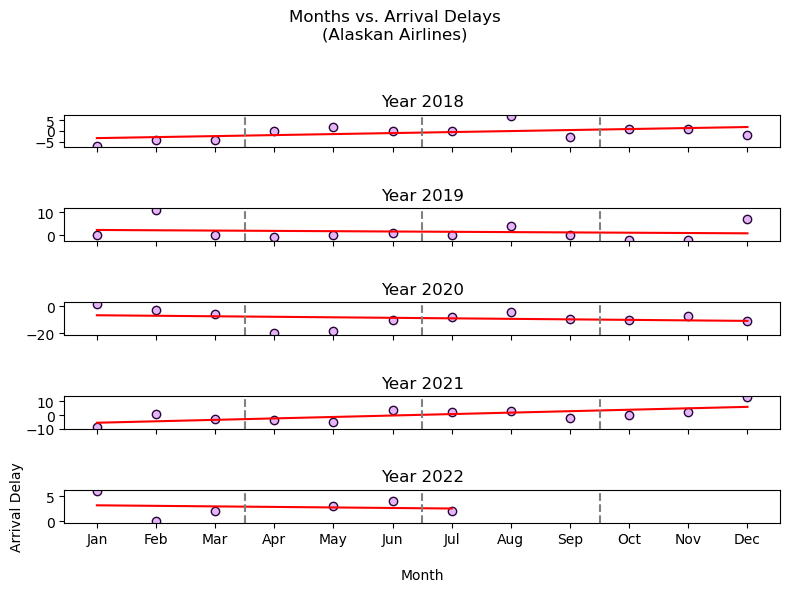

In [53]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years):
    #To choose the year in the DataFrame
    data = alaska_df[alaska_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Arrival Delay'], color = "#e4b5f7", edgecolor = "#2a0638")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Arrival Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    #ax.set_ylim(-25, 30)
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Arrival Delay\n')
fig.suptitle("Months vs. Arrival Delays\n(Alaskan Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

#Saving the graph to a seperate folder
fig.savefig("Question_3/Alaskan_arrival.png")

### II. Frontier Airlines

#### - Departure Delays

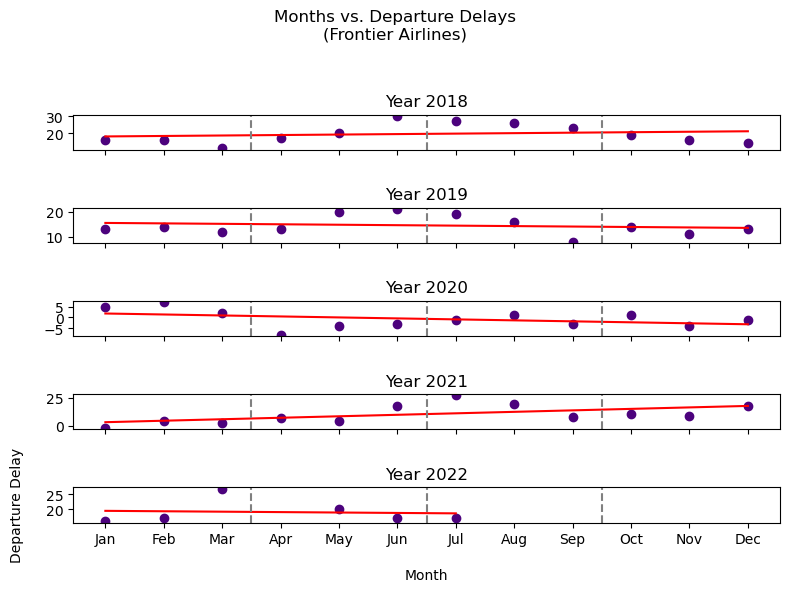

In [54]:
years1 = frontier_df["Year"].unique()

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years1):
    #To choose the year in the DataFrame
    data = frontier_df[frontier_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Departure Delay'], color = "#4c027d")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Departure Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    #ax.set_ylim(-20, 40)
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Departure Delay\n')
fig.suptitle("Months vs. Departure Delays\n(Frontier Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

#Saving the graph to a seperate folder
fig.savefig("Question_3/Frontier_departure.png")

#### - Arrival Delays

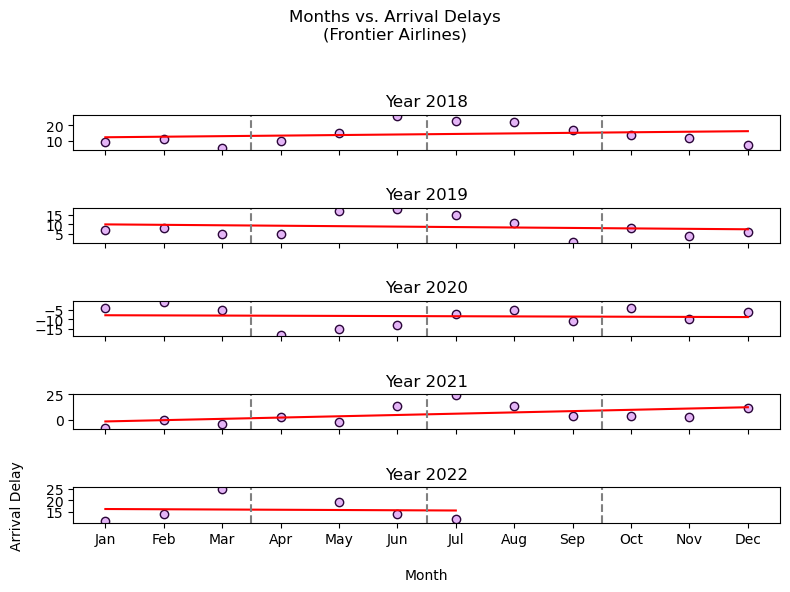

In [55]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years1):
    #To choose the year in the DataFrame
    data = frontier_df[frontier_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Arrival Delay'], color = "#e4b5f7", edgecolor = "#2a0638")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Arrival Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    #ax.set_ylim(-25, 30)
    
#     ax.set_ylim(data['Departure Delay'].min(), data['Departure Delay'].max())
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Arrival Delay\n')
fig.suptitle("Months vs. Arrival Delays\n(Frontier Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

#Saving the graph to a seperate folder
fig.savefig("Question_3/Frontier_arrival.png")

### III. Spirit Airlines

#### - Departure Delays

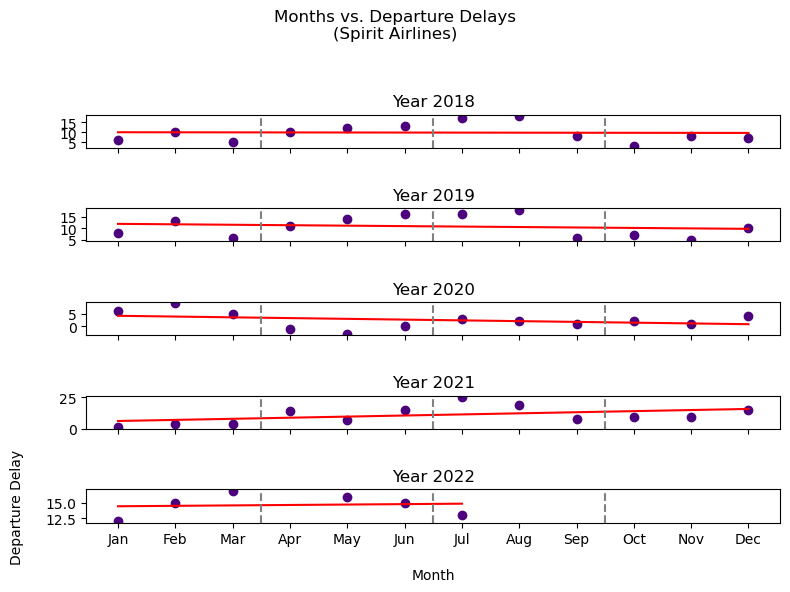

In [56]:
years2 = spirit_df["Year"].unique()

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years):
    #To choose the year in the DataFrame
    data = spirit_df[spirit_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Departure Delay'], color = "#4c027d")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Departure Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    #ax.set_ylim(-20, 40)
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Departure Delay\n')
fig.suptitle("Months vs. Departure Delays\n(Spirit Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

#Saving the graph to a seperate folder
fig.savefig("Question_3/Spirit_departure.png")

#### - Arrival Delays

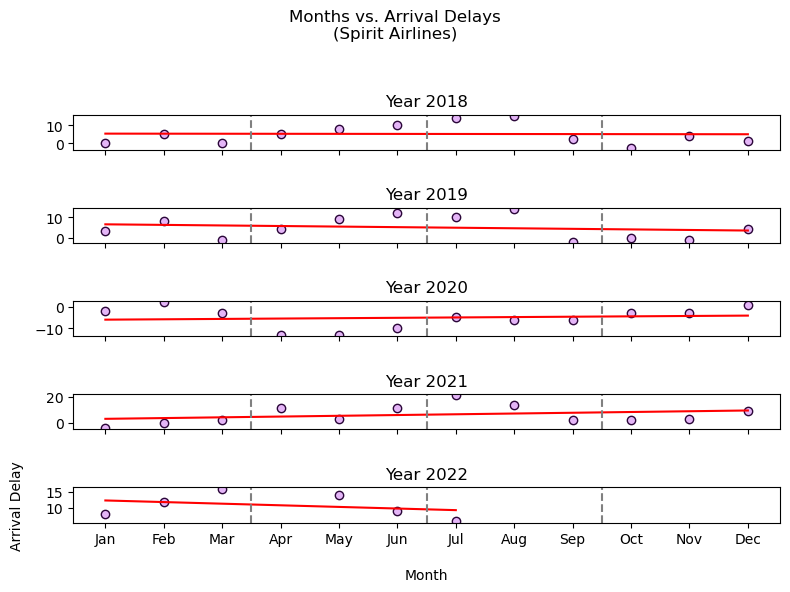

In [57]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years2):
    #To choose the year in the DataFrame
    data = spirit_df[spirit_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Arrival Delay'], color = "#e4b5f7", edgecolor = "#2a0638")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Arrival Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    #ax.set_ylim(-25, 30)
    
#     ax.set_ylim(data['Departure Delay'].min(), data['Departure Delay'].max())
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Arrival Delay\n')
fig.suptitle("Months vs. Arrival Delays\n(Spirit Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

#Saving the graph to a seperate folder
fig.savefig("Question_3/Spirit_arrival.png")

## Summary

After analysing the data from three different airlines for their individual arrival and departure delays, we can draw the following conclusions:-

> - The delays are inconsistent in Q1 and Q4.
> - The number of delays increases in Q2 and gradually decreases in Q3
> - The graphs for most of the graphs show a positive relationship between the month and the delays. This means that the number of delays increases are we near the end of the year

## Limitations

The following are the limitations for this analysis:-

> - 2019 & 2020 was marked as the years for COVID-19 flight restrictions. As a result, travel between certain countries were restricted. As such, this created an inconsistency with the data.
> - The data provided for 2022 is only available till July 2022.

# Question 4 - What are the most common routes prone to delay? 

In [ ]:
airport_1_df = subset_data[['DEST_AIRPORT_ID']].copy()
print(airport_1_df.shape)airport_1_df = subset_data[['DEST_AIRPORT_ID']].copy()

In [29]:
subset_data['DEST_AIRPORT_NAME'] = airport_merge_df['DEST_AIRPORT_NAME']

In [30]:
subset_data['ROUTE_NAME'] = subset_data['Description'] + ' to ' + subset_data['DEST_AIRPORT_NAME']

In [31]:
subset_data.tail(100)

,ORIGIN_AIRPORT_ID,Description,Code.y,OP_UNIQUE_CARRIER,airline_name,YEAR,MONTH,FL_DATE,OP_CARRIER_FL_NUM,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,DEST_AIRPORT_NAME,ROUTE_NAME
2359876,13232,"Chicago, IL: Chicago Midway International",MDW,F9,Frontier,2022,7,7/28/22 00:00,2595,15304,-3.0,10.0,0,0,"Tampa, FL: Tampa International","Chicago, IL: Chicago Midway International to T..."
2359877,13232,"Chicago, IL: Chicago Midway International",MDW,F9,Frontier,2022,7,7/28/22 00:00,1355,10397,-7.0,-15.0,0,0,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...","Chicago, IL: Chicago Midway International to A..."
2359878,13232,"Chicago, IL: Chicago Midway International",MDW,F9,Frontier,2022,7,7/29/22 00:00,1355,10397,16.0,13.0,0,0,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...","Chicago, IL: Chicago Midway International to A..."
2359879,13232,"Chicago, IL: Chicago Midway International",MDW,F9,Frontier,2022,7,7/29/22 00:00,1462,14100,-9.0,-13.0,0,0,"Philadelphia, PA: Philadelphia International","Chicago, IL: Chicago Midway International to P..."
2359880,13232,"Chicago, IL: Chicago Midway International",MDW,F9,Frontier,2022,7,7/29/22 00:00,1375,14107,-5.0,13.0,0,0,"Phoenix, AZ: Phoenix Sky Harbor International","Chicago, IL: Chicago Midway International to P..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359971,12191,"Houston, TX: William P Hobby",HOU,F9,Frontier,2022,7,7/28/22 00:00,1941,12889,173.0,165.0,0,0,"Las Vegas, NV: McCarran International","Houston, TX: William P Hobby to Las Vegas, NV:..."
2359972,12191,"Houston, TX: William P Hobby",HOU,F9,Frontier,2022,7,7/29/22 00:00,1338,13204,120.0,119.0,0,0,"Orlando, FL: Orlando International","Houston, TX: William P Hobby to Orlando, FL: O..."
2359973,12191,"Houston, TX: William P Hobby",HOU,F9,Frontier,2022,7,7/29/22 00:00,1939,12889,41.0,33.0,0,0,"Las Vegas, NV: McCarran International","Houston, TX: William P Hobby to Las Vegas, NV:..."
2359974,12191,"Houston, TX: William P Hobby",HOU,F9,Frontier,2022,7,7/30/22 00:00,1338,13204,36.0,44.0,0,0,"Orlando, FL: Orlando International","Houston, TX: William P Hobby to Orlando, FL: O..."


In [32]:
subset_data[subset_data['DEST_AIRPORT_ID']==14107]['DEST_AIRPORT_NAME'].unique()

array(['Phoenix, AZ: Phoenix Sky Harbor International'], dtype=object)

In [33]:
subset_data[subset_data['DEST_AIRPORT_ID']==13204]['DEST_AIRPORT_NAME'].unique()

array(['Orlando, FL: Orlando International'], dtype=object)

In [34]:
subset_data.head()

,ORIGIN_AIRPORT_ID,Description,Code.y,OP_UNIQUE_CARRIER,airline_name,YEAR,MONTH,FL_DATE,OP_CARRIER_FL_NUM,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,DEST_AIRPORT_NAME,ROUTE_NAME
0,14057,"Portland, OR: Portland International",PDX,AS,Alaska,2018,1,1/9/18 00:00,498,12892,-13.0,-46.0,0,0,"Los Angeles, CA: Los Angeles International","Portland, OR: Portland International to Los An..."
1,14057,"Portland, OR: Portland International",PDX,AS,Alaska,2018,1,1/9/18 00:00,502,12892,-12.0,-2.0,0,0,"Los Angeles, CA: Los Angeles International","Portland, OR: Portland International to Los An..."
2,14057,"Portland, OR: Portland International",PDX,AS,Alaska,2018,1,1/9/18 00:00,532,14679,-5.0,-8.0,0,0,"San Diego, CA: San Diego International","Portland, OR: Portland International to San Di..."
3,14057,"Portland, OR: Portland International",PDX,AS,Alaska,2018,1,1/9/18 00:00,540,12892,-11.0,-23.0,0,0,"Los Angeles, CA: Los Angeles International","Portland, OR: Portland International to Los An..."
4,14057,"Portland, OR: Portland International",PDX,AS,Alaska,2018,1,1/9/18 00:00,544,12892,-6.0,12.0,0,0,"Los Angeles, CA: Los Angeles International","Portland, OR: Portland International to Los An..."


Routes with the Highest Average Delay:
                                             ROUTE_NAME  Average Delay
1707  Raleigh/Durham, NC: Raleigh-Durham Internation...     888.000000
1377  Ontario, CA: Ontario International to Burbank,...     675.000000
1593  Phoenix, AZ: Phoenix Sky Harbor International ...     400.000000
377   Cleveland, OH: Cleveland-Hopkins International...     217.000000
874   Jacksonville, FL: Jacksonville International t...     144.000000
817   Houston, TX: William P Hobby to Las Vegas, NV:...      79.702703
692   Fort Lauderdale, FL: Fort Lauderdale-Hollywood...      77.166667
378   Cleveland, OH: Cleveland-Hopkins International...      68.000000
755   Green Bay, WI: Green Bay Austin Straubel Inter...      67.666667
697   Fort Lauderdale, FL: Fort Lauderdale-Hollywood...      63.400000


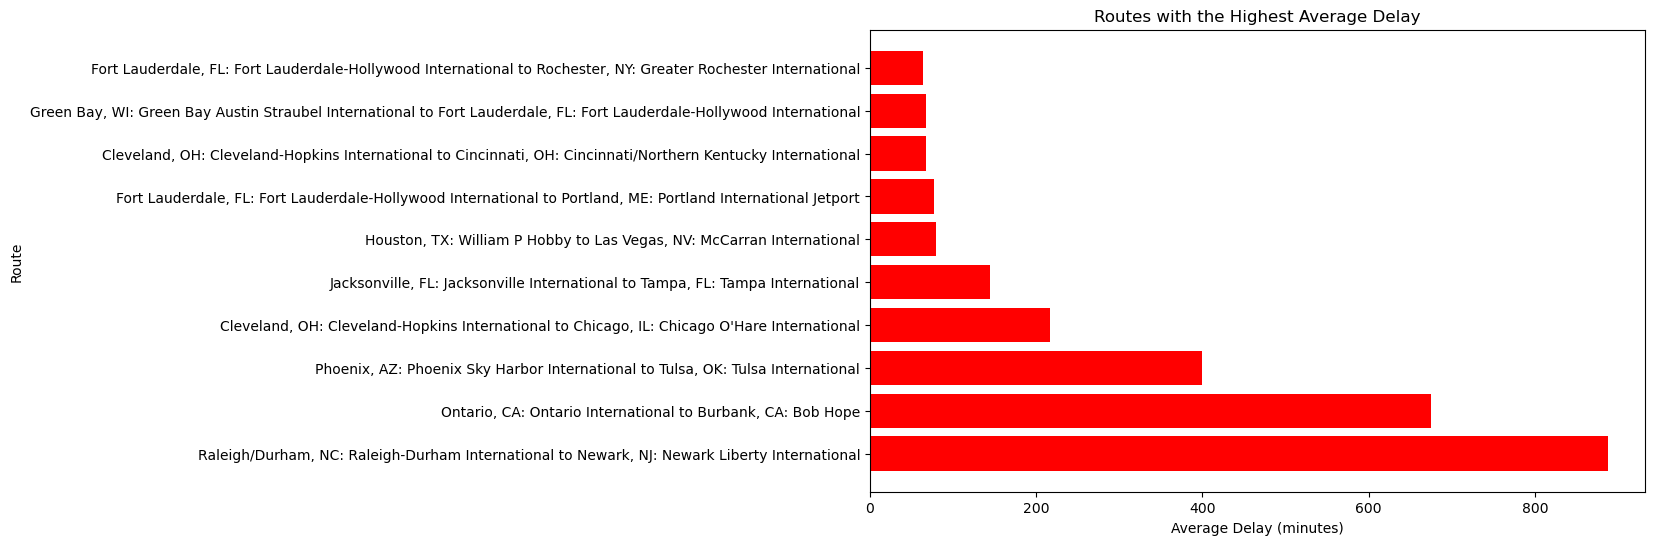

In [39]:
route_delay = subset_data.groupby('ROUTE_NAME')['DEP_DELAY'].mean().reset_index(name='Average Delay')

# Sort by average delay descending order
route_delay = route_delay.sort_values('Average Delay', ascending=False)

# routes with the highest average delay
print("Routes with the Highest Average Delay:")
print(route_delay.head(10))

# top 10 routes with the highest average delay
top_routes = route_delay.head(10)

# Create a bar plot for routes with the highest average delay
plt.figure(figsize=(10, 6))
plt.barh(top_routes['ROUTE_NAME'], top_routes['Average Delay'], color='red')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Route')
plt.title('Routes with the Highest Average Delay')
plt.show()


    MONTH airline_name  Average Delay
0       1       Alaska       2.873950
1       1     Frontier      10.198760
2       1       Spirit       6.939338
3       2       Alaska       3.940061
4       2     Frontier      12.154044
5       2       Spirit      10.491985
6       3       Alaska       1.742150
7       3     Frontier      11.424021
8       3       Spirit       7.937550
9       4       Alaska       0.942417
10      4     Frontier      11.248953
11      4       Spirit      10.320384
12      5       Alaska       2.380257
13      5     Frontier      14.759722
14      5       Spirit      12.056334
15      6       Alaska       4.559749
16      6     Frontier      18.812466
17      6       Spirit      14.035107
18      7       Alaska       3.783227
19      7     Frontier      19.279120
20      7       Spirit      14.912530
21      8       Alaska       5.617150
22      8     Frontier      16.911184
23      8       Spirit      15.257191
24      9       Alaska       1.018125
25      9   

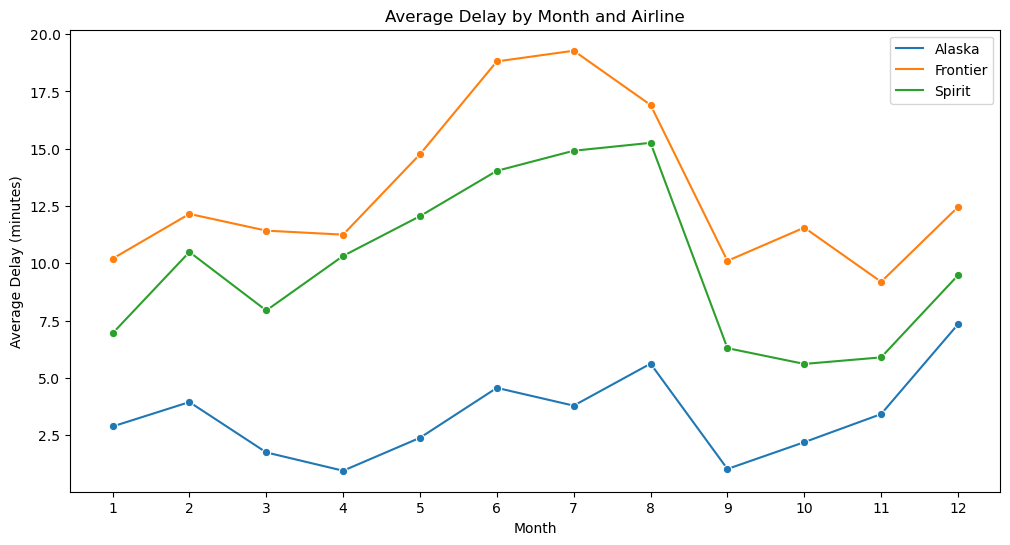

In [38]:
monthly_delay = subset_data.groupby(['MONTH', 'airline_name'])['DEP_DELAY'].mean().reset_index(name='Average Delay')
print(monthly_delay)
std_dev = monthly_delay.groupby('airline_name')['Average Delay'].std()
print("Standard Deviation:")
print(std_dev)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_delay, x='MONTH', y='Average Delay', hue='airline_name', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay by Month and Airline')
plt.xticks(range(1, 13))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
